# Model Training

## 1.1 Import Data and Required packages

In [21]:
# Basic import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings


In [22]:
# read in data
df = pd.read_csv("https://raw.githubusercontent.com/im-vishal/artifacts/refs/heads/main/student.csv")

# show top 5 records
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and Y

In [23]:
X = df.drop(columns=["math_score"], axis=1)
X.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93


In [24]:
# get categories in categorical columns
cat_columns = df.select_dtypes(include="object").columns

for column in cat_columns:
    print(f"Categories in '{column}' column: {df[column].unique()}")

Categories in 'gender' column: ['female' 'male']
Categories in 'race_ethnicity' column: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' column: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' column: ['standard' 'free/reduced']
Categories in 'test_preparation_course' column: ['none' 'completed']


In [25]:
y = df["math_score"]
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [26]:
# Create column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

X = preprocessor.fit_transform(X)

X.shape

(1000, 19)

In [27]:
# Separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

### Create an evaluate function to give all metrics after model training

In [28]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

### Instantiate model, train and evaluate

### XGB Regression

In [29]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
mae, rmse, r2 = evaluate_model(y_test, y_pred)
score = r2 * 100
print(f"Accuracy of the Base model is {r2:.2f}%")

Accuracy of the Base model is 0.83%


### Plot y_pred and y_test

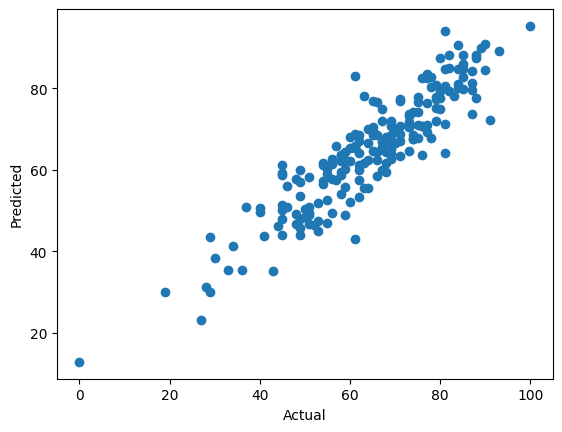

In [30]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted");
plt.show()

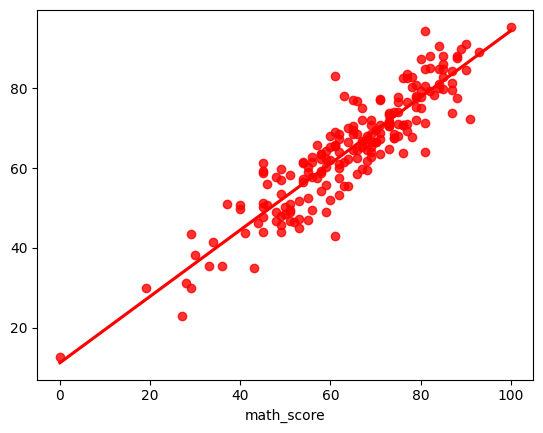

In [31]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="red");
plt.show()